In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [21]:
#chekc for GPU
!nvidia-smi

Sat Jul 22 05:41:48 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   76C    P0    32W /  70W |   1715MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [22]:
# Get the current working directory and assign it to the variable HOME

HOME = '/content/drive/MyDrive/yolov8_shelf_detection'
print(HOME)

/content/drive/MyDrive/yolov8_shelf_detection


In [23]:
!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks() # Run checks to ensure everything is working properly

from ultralytics import YOLO
from IPython.display import Image


Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.4/78.2 GB disk)


# Training the model

In [ ]:
# %cd {HOME}
# # task set to detection, mode set to training using pretrained weights from yolov8n.pt
# !yolo task=detect mode=train model=yolov8n.pt data=HOME/dataset/data.yaml epochs=100 imgsz=640 plots=True

In [ ]:
# # the files generated after training
# !ls {HOME}/runs/detect/train/

In [ ]:
# %cd {HOME}
# Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

In [ ]:
# %cd {HOME}
# Image(filename=f'{HOME}/runs/detect/train/results.png', width=800)

# Validating the Model

In [29]:
%cd {HOME}

/content/drive/MyDrive/yolov8_shelf_detection


In [30]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/files/best.pt conf=0.5 data={HOME}/dataset/data.yaml

/content/drive/MyDrive/yolov8_shelf_detection
2023-07-22 05:58:11.201504: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/yolov8_shelf_detection/dataset/valid/labels... 30 images, 0 backgrounds, 0 corrupt: 100% 30/30 [00:00<00:00, 306.17it/s]
val: New cache created: /content/drive/MyDrive/yolov8_shelf_detection/dataset/valid/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:04<00:00,  2.11s/it]
                   all         30       1036       0.87       0.92      0.894      0.728
                     0         30        803      0.973      0.981       0.99      0.794
                     1         30         32          1          1      0.995      0.778
                   

# Evaluating the model

### currently there is no way to test the performance of the model on the test dataset. So we will make some changes to the yaml file and replace the val with test and run mode=val so as to get the metrics for test performance.

*(Apologies)*
*Not an efficient option but this is what striked at the moment.*

In [31]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/files/best.pt conf=0.5 data={HOME}/dataset/data.yaml

/content/drive/MyDrive/yolov8_shelf_detection
2023-07-22 06:07:17.332475: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/yolov8_shelf_detection/dataset/test/labels... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:00<00:00, 291.60it/s]
val: New cache created: /content/drive/MyDrive/yolov8_shelf_detection/dataset/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:09<00:00,  2.39s/it]
                   all         50       1847      0.849      0.788      0.841      0.675
                     0         50       1480      0.966      0.909      0.946      0.742
                     1         50         32          1          1      0.995      0.793
                    1

*pssst...(make sure to put everything back in its place.)*

In [41]:
%cd {HOME}/files

import re
import json

# Capture the output in a variable
output = """/content
2023-07-22 05:08:40.167864: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-07-22 05:08:41.048912: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs
val: Scanning /content/drive/MyDrive/retail_object_detection.v2i.yolov8/test/labels... 50 images, 0 backgrounds, 0 corrupt: 100% 50/50 [00:37<00:00,  1.32it/s]
val: New cache created: /content/drive/MyDrive/retail_object_detection.v2i.yolov8/test/labels.cache
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 4/4 [00:09<00:00,  2.34s/it]
                   all         50       1847      0.849      0.788      0.841      0.675
                     0         50       1480      0.966      0.909      0.946      0.742
                     1         50         32          1          1      0.995      0.793
                    10         50         10      0.604      0.461      0.579      0.457
                     2         50        155      0.952      0.895      0.932      0.723
                     3         50         13      0.667      0.462      0.642      0.499
                     4         50         49      0.904      0.796       0.85      0.681
                     5         50         10          1          1      0.995      0.817
                     6         50         16      0.525      0.562       0.65      0.498
                     7         50         55      0.727      0.725      0.739      0.633
                     8         50         20          1          1      0.995      0.807
                     9         50          7          1      0.857      0.928      0.781
Speed: 12.1ms pre-process, 31.4ms inference, 0.0ms loss, 12.6ms post-process per image"""

# Define a regular expression to extract the values for class 'all'
pattern = r"all\s+(\d+)\s+(\d+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)\s+([\d.]+)"
matches = re.search(pattern, output)

# Check if the pattern is found and extract the values
if matches:
    images, instances, precision, recall, mAP50, mAP50_95 = matches.groups()
    precision = float(precision)
    recall = float(recall)
    mAP50_95 = float(mAP50_95)

    # Create a dictionary to store the results for class 'all'
    results_dict = {
        "precision": precision,
        "recall": recall,
        "mAP": mAP50_95
    }

    # Save the results_dict to a JSON file
    with open(f'{HOME}/outputs/results.json', 'w') as f:
        json.dump(results_dict, f)

    print("Results for class 'all' saved to results.json.")
else:
    print("Class 'all' not found in the output.")


/content/drive/MyDrive/yolov8_shelf_detection/files
Results for class 'all' saved to results.json.


In [33]:
%cd {HOME}

from ultralytics import YOLO

# Load the trainde model
model = YOLO(f'{HOME}/files/best.pt')

# Define path to the image file
source = f'{HOME}/dataset/test/images/C1_P01_N2_S2_1_JPG.rf.75fabab5ef6cf89e96239f9b485cf7ae.jpg'

# Run inference on the source
results = model(source, save = True)


/content/drive/MyDrive/yolov8_shelf_detection


Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs
Results saved to runs/detect/predict


In [34]:
results

[Ultralytics YOLO <class 'ultralytics.yolo.engine.results.Boxes'> masks
 type: <class 'torch.Tensor'>
 shape: torch.Size([11, 6])
 dtype: torch.float32
  + tensor([[293.00000, 343.00000, 379.00000, 528.00000,   0.94888,   1.00000],
         [376.00000, 348.00000, 460.00000, 526.00000,   0.94790,   1.00000],
         [111.00000,   5.00000, 201.00000, 190.00000,   0.90781,   0.00000],
         [291.00000,  12.00000, 385.00000, 198.00000,   0.89780,   0.00000],
         [119.00000, 311.00000, 208.00000, 521.00000,   0.89607,   0.00000],
         [208.00000, 336.00000, 296.00000, 523.00000,   0.88923,   0.00000],
         [380.00000,  13.00000, 472.00000, 200.00000,   0.87884,   0.00000],
         [199.00000,   8.00000, 292.00000, 194.00000,   0.86767,   0.00000],
         [457.00000, 357.00000, 542.00000, 522.00000,   0.85148,   0.00000],
         [468.00000,  16.00000, 557.00000, 204.00000,   0.84814,   0.00000],
         [607.00000, 344.00000, 640.00000, 513.00000,   0.81829,   0.00000]

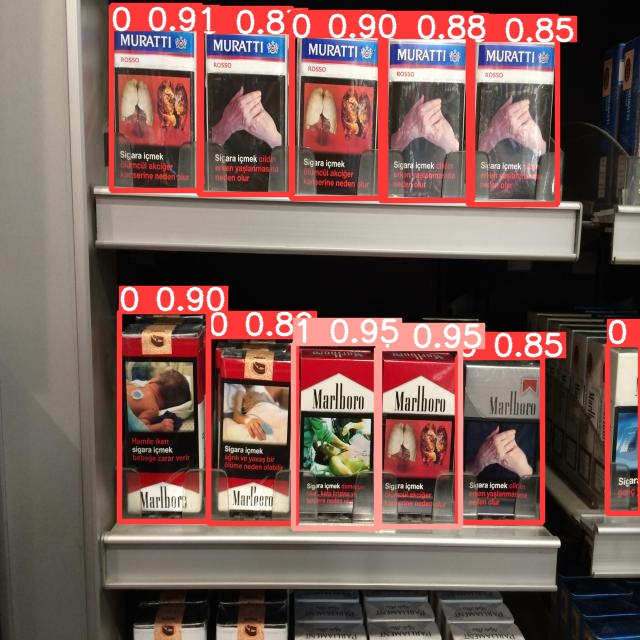

In [35]:
Image(filename=f'{HOME}/runs/detect/predict/C1_P01_N2_S2_1_JPG.rf.75fabab5ef6cf89e96239f9b485cf7ae.jpg', height=600)

In [36]:
result = results[0].boxes
print(len(result))

11


# Inference with the model

In [39]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/files/best.pt conf=0.5 source={HOME}/dataset/test/images

/content/drive/MyDrive/yolov8_shelf_detection
2023-07-22 06:26:34.046920: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs
image 1/50 /content/drive/MyDrive/yolov8_shelf_detection/dataset/test/images/C1_P01_N1_S3_2_JPG.rf.2a4b6986fbf8a837c9fe2b639f688648.jpg: 640x640 13 0s, 2 1s, 7.2ms
image 2/50 /content/drive/MyDrive/yolov8_shelf_detection/dataset/test/images/C1_P01_N2_S2_1_JPG.rf.75fabab5ef6cf89e96239f9b485cf7ae.jpg: 640x640 9 0s, 2 1s, 7.2ms
image 3/50 /content/drive/MyDrive/yolov8_shelf_detection/dataset/test/images/C1_P01_N2_S3_1_JPG.rf.baa15acde818a3eb563fa854b1cb0c33.jpg: 640x640 10 0s, 2 1s, 3 4s, 7.1ms
image 4/50 /content/drive/MyDrive/yolov8_shelf_detection/dataset/test/images/C1_P02_N4_S2_1_JPG.rf.bde873c78e08eab384d6ad9d9f07027f.jpg: 640x640 22 0s, 7.2ms
image 5/50

**NOTE:** Let's take a look at few results.

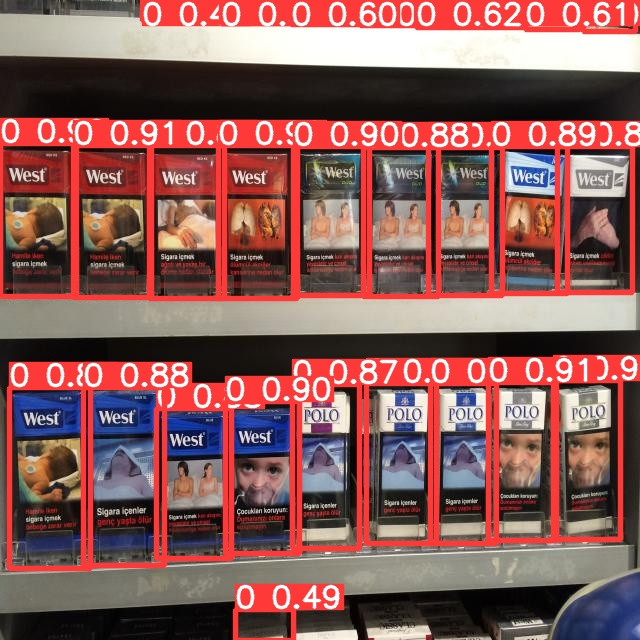

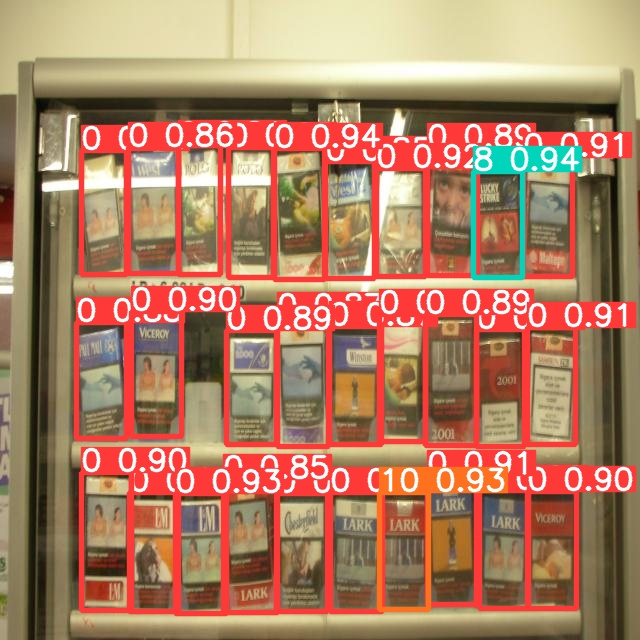

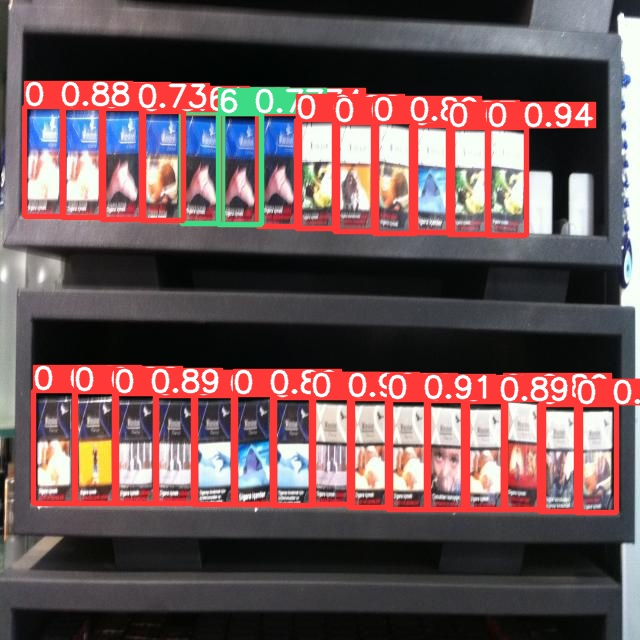

In [40]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict2/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

# saving the output(total products detected per image) to a json format.

In [42]:
%cd {HOME}

from ultralytics import YOLO
import os
import json

# trained model
model = YOLO(f'{HOME}/files/best.pt')

# path to the directory containing the images
image_dir = f'{HOME}/dataset/test/images'

# empty dictionary to store image names and total bounding boxes
result_dict = {}

# Loop through each image in the directory
for image_name in os.listdir(image_dir):
    # Get the full path of the image
    image_path = os.path.join(image_dir, image_name)

    # Run inference on the image and get the bounding box predictions
    results = model(image_path, save=True)
    result = results[0].boxes

    # Get the total number of bounding boxes predicted
    total_bboxes = len(result)

    # Get the image name without the extension
    image_name_without_extension = image_name.split('.')[0][:-4] + '.JPG'

    # Add the image name and total bounding boxes to the dictionary
    result_dict[image_name_without_extension] = int(total_bboxes)

# Save the result dictionary in JSON format
with open(f'{HOME}/outputs/image2products.json', 'w') as json_file:
    json.dump(result_dict, json_file)

print("Predictions saved to image2products.json.")


Ultralytics YOLOv8.0.20 🚀 Python-3.10.6 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3007793 parameters, 0 gradients, 8.1 GFLOPs


/content/drive/MyDrive/yolov8_shelf_detection


Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results saved to runs/detect/predict3
Results save

Predictions saved to image2products.json.
